# Exploratory Data Analysis of Vehicle Sales Data

## Table of Contents
1. Introduction
2. Importing Libraries
3. Data Acquisition & Description
4. Data Pre-Processing
5. Data Visualization

---

## 1. Introduction
This Jupyter notebook is dedicated to the exploratory data analysis of the `vehicles_us.csv` dataset. The primary objectives are:
- To preprocess the data, addressing missing values and outliers.
- To visualize the data, uncovering trends and insights that can inform further analysis.
This analysis aims to provide a comprehensive overview of vehicle sales data, offering valuable insights into market trends and vehicle characteristics.



## 2. Importing Libraries
In this section, we import the necessary libraries for data manipulation, analysis, and visualization. These libraries provide a range of functions that facilitate our exploratory data analysis.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st

## 3. Data Acquisition & Description

### 3.1 Reading CSV File
Here, we read the dataset from the CSV file. This step is crucial for loading the data into a DataFrame for further analysis.


In [170]:
df = pd.read_csv(r'C:\Users\James\TripleTen\vehicles_us.csv')


### 3.2 Overview of the Dataset
We take a quick look at the first few rows of the dataset and its shape to understand its structure and size.


In [171]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [172]:
df.shape

(51525, 13)

### 3.2 Overview of the Dataset
We take a quick look at the first few rows of the dataset and its shape to understand its structure and size.


In [173]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

### 3.3 Understanding Data Types and Descriptive Statistics
Examining the data types of each column and obtaining a descriptive statistical summary helps in understanding the nature of the data we are dealing with.



In [174]:
df.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

## 4. Data Pre-Processing

### 4.1 Handling Missing Values
Here, we address missing values in key columns such as 'model_year', 'cylinders', and 'odometer' by using group-wise median filling. This approach maintains data integrity while dealing with missing data.

In [175]:
df.isnull().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [176]:
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))


In [177]:
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))


In [178]:
df['odometer'] = df.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

C:\Users\James\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



In [179]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'model_year')
df = remove_outliers(df, 'price')


In [180]:
print(df['fuel'].value_counts())

fuel
gas         45253
diesel       2944
hybrid        409
other         106
electric        6
Name: count, dtype: int64


## 5. Data Visualization

### 5.1 Histogram of Vehicle Prices

This section presents a histogram of vehicle prices, which is a graphical representation showing the distribution of prices within the dataset. The histogram is an effective tool for visualizing the frequency distribution of numerical data and is particularly useful for understanding the spread and central tendency of prices in our vehicle dataset.


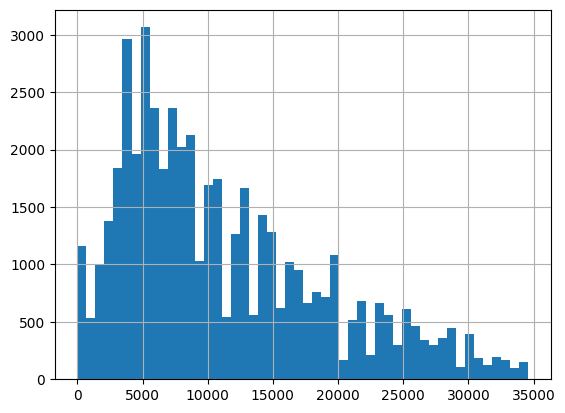

In [181]:
df['price'].hist(bins=50)
plt.show()

### 5.1 Distribution of Numberical Data

In [182]:
df['model'].value_counts()

model
ford f-150                    2621
chevrolet silverado 1500      2058
ram 1500                      1702
chevrolet silverado           1140
jeep wrangler                 1013
                              ... 
ford f350 super duty           229
dodge dakota                   222
ford f350                      203
chevrolet silverado 3500hd     201
ford f-250 super duty          196
Name: count, Length: 99, dtype: int64

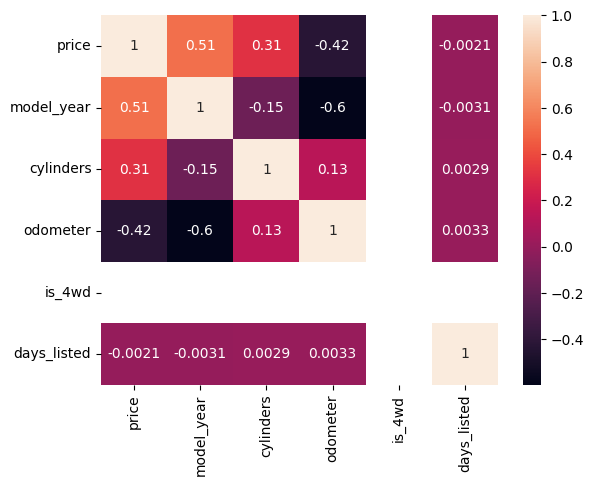

In [183]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 5.2 Correlation on Numeric Column Only

In [184]:
fig = px.histogram(df, x='price', nbins=50, title='Price Distribution')
fig.show()

fig = px.histogram(df, x='odometer', nbins=50, title='Odometer Distribution')
fig.show()

### 5.3 Histogram for Price vs. Model Year

In [185]:
fig = px.scatter(df, x='model_year', y='price', title='Price vs. Model Year')
fig.show()

### 5.4 Scatterplot for price and odometer

In [186]:
fig = px.scatter(df, x='odometer', y='price', title='Price vs. Odometer')
fig.show()

### 5.5 Bar Chart for Average Price by Car Conditions

In [187]:
avg_price_condition = df.groupby('condition')['price'].mean().reset_index()
fig = px.bar(avg_price_condition, x='condition', y='price', title='Average Price by Car Condition')
fig.show()

### 5.6 Bar Chart for Average price based on cylinders and fuel type

In [188]:
avg_price_cylinders_fuel = df.groupby(['cylinders', 'fuel'])['price'].mean().reset_index()
fig = px.bar(avg_price_cylinders_fuel, x='cylinders', y='price', color='fuel', barmode='group', title='Average Price by Cylinders and Fuel Type')
fig.show()

C:\Users\James\AppData\Local\Temp\ipykernel_39476\1651309326.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



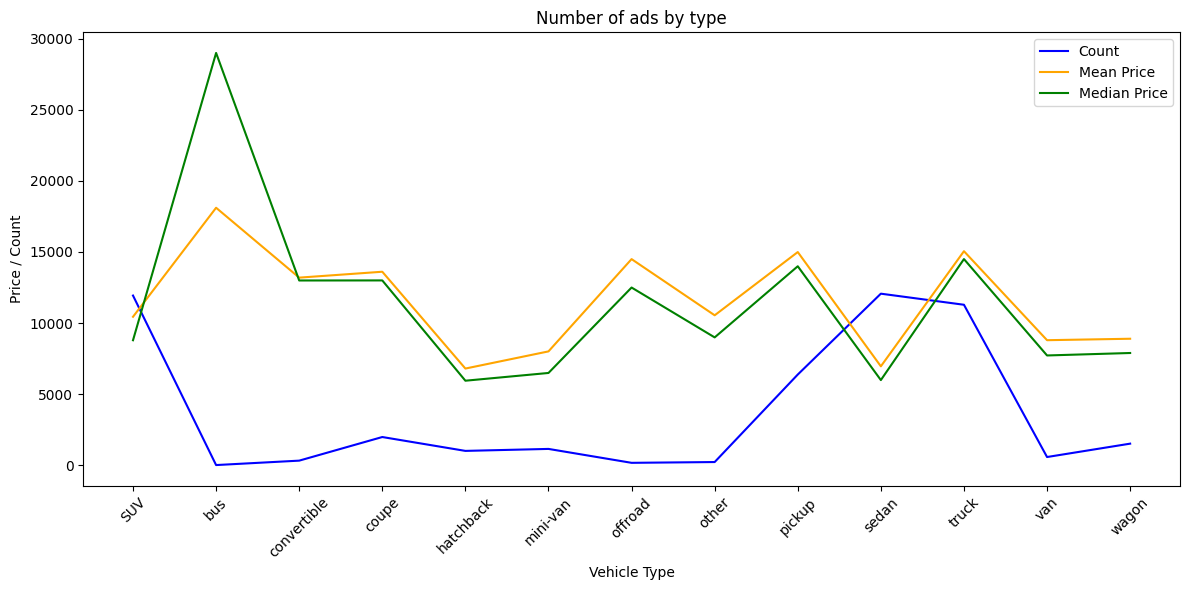

In [190]:
df['type'] = df['type'].astype('category')
df['price'] = df['price'].astype('float')
grouped = df.groupby('type')['price'].agg(['count', 'mean', 'median']).reset_index()
plt.figure(figsize=(12, 6))  
plt.plot(grouped['type'], grouped['count'], label='Count', color='blue')
plt.plot(grouped['type'], grouped['mean'], label='Mean Price', color='orange')
plt.plot(grouped['type'], grouped['median'], label='Median Price', color='green')
plt.xlabel('Vehicle Type')
plt.ylabel('Price / Count')
plt.title('Number of ads by type')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 6 Conclusion